In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from sklearn.decomposition import PCA
import seaborn as sn
from scipy import stats
import skfuzzy
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score
from mat4py import loadmat

In [2]:
data = loadmat('emnist-digits-150.mat')
a = data['dataset']
b = a['DigitImage']
images = b['images']
labels = b['labels']
digits = np.array(images)
bwdigits = digits

In [3]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame

In [4]:
label = []
for i in range (len(labels)):
    label.append(labels[i][0])

In [5]:
# extracting features from pca method 
pca=PCA(n_components=10)
pca.fit(digits)
NewDigits=pca.transform(digits)
newww = NewDigits[:,0:2]

In [6]:
Data = pd.DataFrame(NewDigits, columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
# Data = pd.DataFrame(newww, columns = ['f1','f2'])
Data['TARGET'] = label
Data['f1'] = Data['f1']+(abs(Data['f1'].min()))
Data['f2'] = Data['f2']+(abs(Data['f2'].min()))
Data['f3'] = Data['f3']+(abs(Data['f3'].min()))
Data['f4'] = Data['f4']+(abs(Data['f4'].min()))
Data['f5'] = Data['f5']+(abs(Data['f5'].min()))
Data['f6'] = Data['f6']+(abs(Data['f6'].min()))
Data['f7'] = Data['f7']+(abs(Data['f7'].min()))
Data['f8'] = Data['f8']+(abs(Data['f8'].min()))
Data['f9'] = Data['f9']+(abs(Data['f9'].min()))
Data['f10'] = Data['f10']+(abs(Data['f10'].min()))
# Data['f11'] = Data['f11']+(abs(Data['f11'].min()))
# Data['f12'] = Data['f12']+(abs(Data['f12'].min()))
# Data['f13'] = Data['f13']+(abs(Data['f13'].min()))
# Data['f14'] = Data['f14']+(abs(Data['f14'].min()))
# Data['f15'] = Data['f15']+(abs(Data['f15'].min()))
Data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,TARGET
0,1984.644999,969.895156,1252.397540,1306.804581,1609.599281,487.818371,1233.354737,1034.429783,343.373051,1354.099768,0
1,119.172655,1027.150573,1224.746657,1019.665521,631.086394,525.739729,902.099256,829.413990,227.762188,781.241566,9
2,559.194744,957.824763,2116.004123,1779.549575,767.493683,137.555687,409.912913,1013.360853,584.837246,789.451332,7
3,264.297638,462.975201,1938.882486,1977.227762,689.737296,891.904900,755.848262,240.510600,579.534180,1268.599940,9
4,1068.260787,1702.968183,1338.236072,1336.332837,718.844537,778.388161,723.404592,14.034215,1695.902312,1099.066952,2
...,...,...,...,...,...,...,...,...,...,...,...
145,524.596690,1673.649890,1589.361246,1354.717517,1746.748244,812.023523,546.806101,1582.930925,832.500133,542.746825,7
146,1387.615865,205.198902,802.792802,1510.106215,1082.576944,1704.305569,413.820739,601.980311,188.291036,690.057130,8
147,1014.425282,639.166118,827.038568,1145.217695,746.330628,518.646195,1245.525501,1574.092932,702.734157,1348.743313,5
148,779.498391,317.544448,850.986361,585.725810,690.317255,1193.034711,138.959442,0.000000,213.895240,979.189865,2


In [7]:
Dataset = PreprocessData.TestAndTrain(Data , 80)

Datas = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)

In [8]:
memberships = []
fuzzyfiedsets = []
fuzzyfiedtarget = []

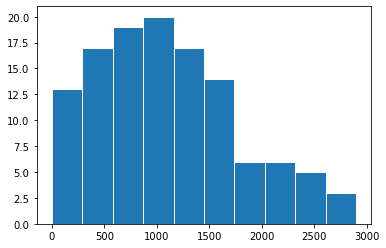

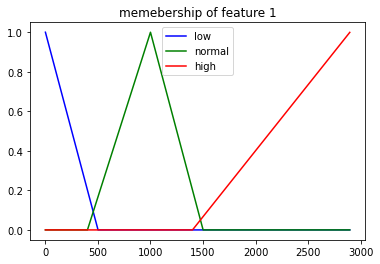

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


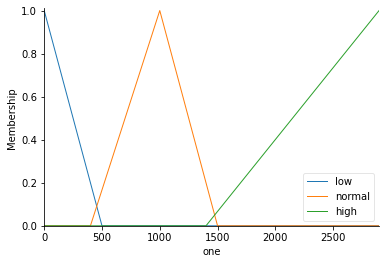

In [9]:
#feature one

one= list(Datas['f1'])

plt.figure()
plt.hist(one,edgecolor="white")
plt.show()
minn= np.min(one)
maxx = np.max(one)


dom = np.arange(minn, maxx)
onelow = skfuzzy.membership.trimf(dom ,[minn,minn,500] )
onenormal= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
onehigh = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
fuzzyfiedsets.append([onelow,onenormal,onehigh])

plt.figure()
plt.plot(onelow , 'b',label='low')
plt.plot(onenormal , 'g',label='normal')
plt.plot(onehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 1')
plt.legend()
plt.show()


one = ctrl.Antecedent(np.arange(minn, maxx), 'one')

one['low'] = skfuzzy.membership.trimf(dom ,[minn,minn,500] )
one['normal']= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
one['high'] = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
memberships.append([one['low'] , one['normal'] ,one['high']])

one.view()



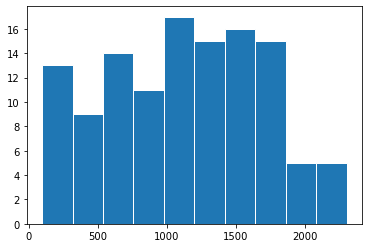

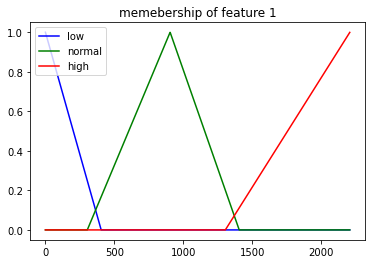

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


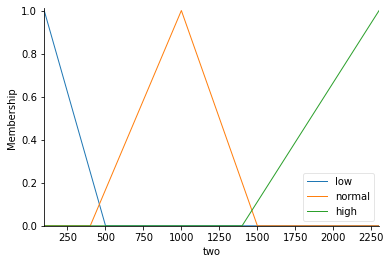

In [10]:
#feature two

two= list(Datas['f2'])

plt.figure()
plt.hist(two,edgecolor="white")
plt.show()
minn= np.min(two)
maxx = np.max(two)


dom = np.arange(minn, maxx)

twolow = skfuzzy.membership.trimf(dom ,[minn,minn,500] )
twonormal= skfuzzy.membership.trimf(dom ,[400,1000,1500] )
twohigh = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
fuzzyfiedsets.append([twolow,twonormal,twohigh])

plt.figure()
plt.plot(twolow , 'b',label='low')
plt.plot(twonormal , 'g',label='normal')
plt.plot(twohigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 1')
plt.legend()
plt.show()


two = ctrl.Antecedent(np.arange(minn, maxx), 'two')

two['low'] = skfuzzy.membership.trimf(two.universe ,[minn,minn,500] )
two['normal']= skfuzzy.membership.trimf(two.universe ,[400,1000,1500] )
two['high'] = skfuzzy.membership.trimf(two.universe ,[1400,maxx,maxx])
memberships.append([two['low'] , two['normal'] ,two['high']])

two.view()


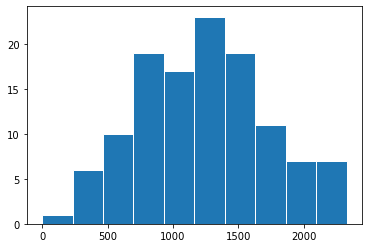

0.0


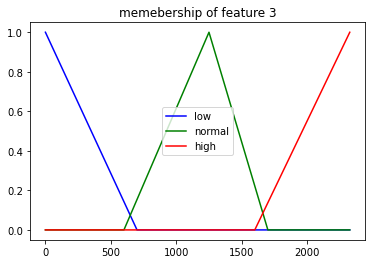

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


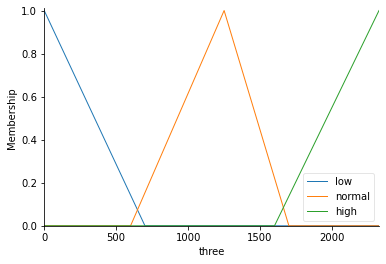

In [11]:
#feature three

three= list(Datas['f3'])

plt.figure()
plt.hist(three,edgecolor="white")
plt.show()
minn= np.min(three)
maxx = np.max(three)

print(minn)
dom = np.arange(minn, maxx,1)

threelow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
threenormal= skfuzzy.membership.trimf(dom ,[600,1250,1700] )
threehigh = skfuzzy.membership.trimf(dom ,[1600,maxx,maxx])
fuzzyfiedsets.append([threelow,threenormal,threehigh])

plt.figure()
plt.plot(threelow , 'b',label='low')
plt.plot(threenormal , 'g',label='normal')
plt.plot(threehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 3')
plt.legend()
plt.show()


z = ctrl.Antecedent(dom, 'three')

z['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
z['normal']= skfuzzy.membership.trimf(dom,[600,1250,1700] )
z['high'] = skfuzzy.membership.trimf(dom ,[1600,maxx,maxx])
memberships.append([z['low'] , z['normal'] ,z['high']])

z.view()


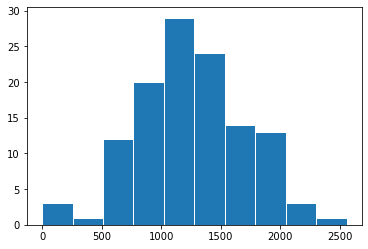

0.0


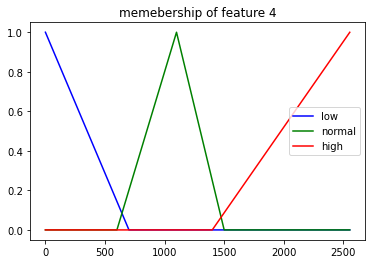

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


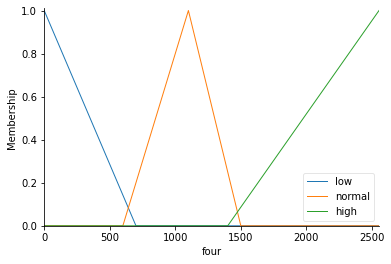

In [12]:
#feature four

four= list(Datas['f4'])

plt.figure()
plt.hist(four,edgecolor="white")
plt.show()
minn= np.min(four)
maxx = np.max(four)

print(minn)
dom = np.arange(minn, maxx,1)

fourlow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
fournormal= skfuzzy.membership.trimf(dom ,[600,1100,1500] )
fourhigh = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
fuzzyfiedsets.append([fourlow,fournormal,fourhigh])

plt.figure()
plt.plot(fourlow , 'b',label='low')
plt.plot(fournormal , 'g',label='normal')
plt.plot(fourhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 4')
plt.legend()
plt.show()


four = ctrl.Antecedent(dom, 'four')

four['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
four['normal']= skfuzzy.membership.trimf(dom,[600,1100,1500] )
four['high'] = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
memberships.append([four['low'] , four['normal'] ,four['high']])

four.view()

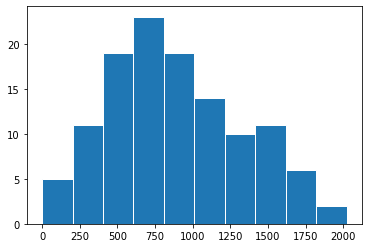

0.0


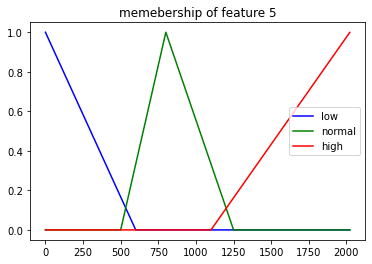

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


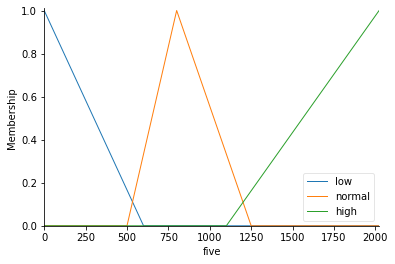

In [13]:
#feature five

five= list(Datas['f5'])

plt.figure()
plt.hist(five,edgecolor="white")
plt.show()
minn= np.min(five)
maxx = np.max(five)

print(minn)
dom = np.arange(minn, maxx,1)

fivelow = skfuzzy.membership.trimf(dom ,[minn,minn,600] )
fivenormal= skfuzzy.membership.trimf(dom ,[500,800,1250] )
fivehigh = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
fuzzyfiedsets.append([fivelow,fivenormal,fivehigh])

plt.figure()
plt.plot(fivelow , 'b',label='low')
plt.plot(fivenormal , 'g',label='normal')
plt.plot(fivehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 5')
plt.legend()
plt.show()


five = ctrl.Antecedent(dom, 'five')

five['low'] = skfuzzy.membership.trimf(dom,[minn,minn,600] )
five['normal']= skfuzzy.membership.trimf(dom,[500,800,1250] )
five['high'] = skfuzzy.membership.trimf(dom ,[1100,maxx,maxx])
memberships.append([five['low'] , five['normal'] ,five['high']])

five.view()

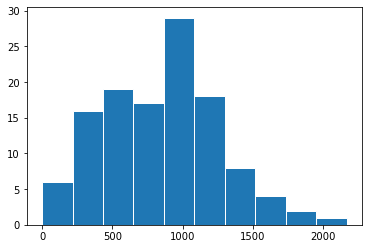

0.0


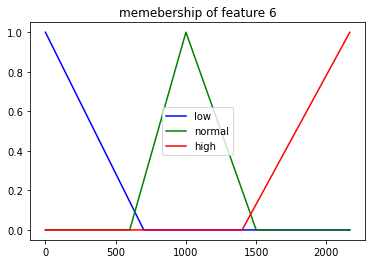

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


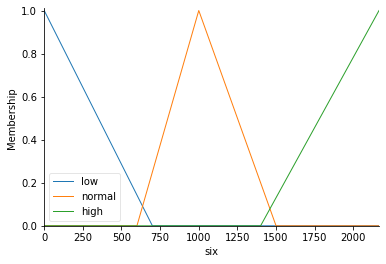

In [14]:
#feature six

six= list(Datas['f6'])

plt.figure()
plt.hist(six,edgecolor="white")
plt.show()
minn= np.min(six)
maxx = np.max(six)

print(minn)
dom = np.arange(minn, maxx,1)

sixlow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
sixnormal= skfuzzy.membership.trimf(dom ,[600,1000,1500] )
sixhigh = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
fuzzyfiedsets.append([sixlow,sixnormal,sixhigh])

plt.figure()
plt.plot(sixlow , 'b',label='low')
plt.plot(sixnormal , 'g',label='normal')
plt.plot(sixhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 6')
plt.legend()
plt.show()


six = ctrl.Antecedent(dom, 'six')

six['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
six['normal']= skfuzzy.membership.trimf(dom,[600,1000,1500] )
six['high'] = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
memberships.append([six['low'] , six['normal'] ,six['high']])

six.view()

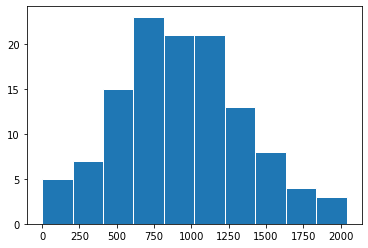

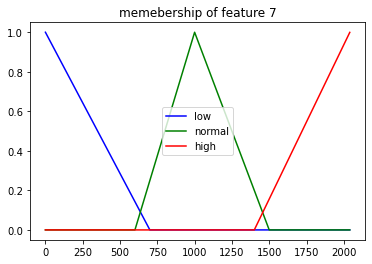

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


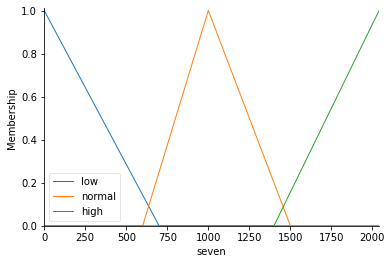

In [15]:
#feature seven

seven= list(Datas['f7'])

plt.figure()
plt.hist(seven,edgecolor="white")
plt.show()
minn= np.min(seven)
maxx = np.max(seven)

dom = np.arange(minn, maxx,1)

sevenlow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
sevennormal= skfuzzy.membership.trimf(dom ,[600,1000,1500] )
sevenhigh = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
fuzzyfiedsets.append([sevenlow,sevennormal,sevenhigh])

plt.figure()
plt.plot(sevenlow , 'b',label='low')
plt.plot(sevennormal , 'g',label='normal')
plt.plot(sevenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 7')
plt.legend()
plt.show()


seven = ctrl.Antecedent(dom, 'seven')

seven['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
seven['normal']= skfuzzy.membership.trimf(dom,[600,1000,1500] )
seven['high'] = skfuzzy.membership.trimf(dom ,[1400,maxx,maxx])
memberships.append([seven['low'] , seven['normal'] ,seven['high']])

seven.view()

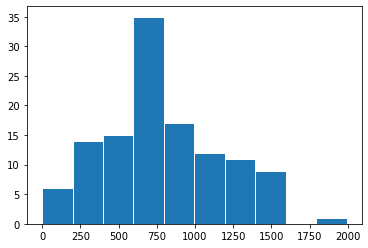

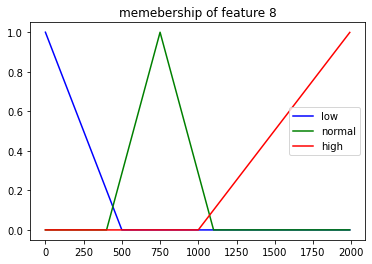

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


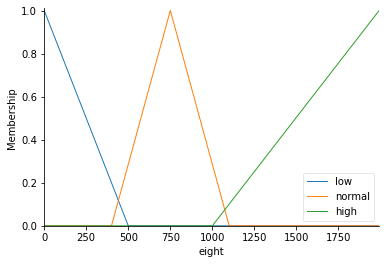

In [16]:
#feature eight

eight= list(Datas['f8'])

plt.figure()
plt.hist(eight,edgecolor="white")
plt.show()
minn= np.min(eight)
maxx = np.max(eight)

dom = np.arange(minn, maxx,1)

eightlow = skfuzzy.membership.trimf(dom ,[minn,minn,500] )
eightnormal= skfuzzy.membership.trimf(dom ,[400,750,1100] )
eighthigh = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
fuzzyfiedsets.append([eightlow,eightnormal,eighthigh])

plt.figure()
plt.plot(eightlow , 'b',label='low')
plt.plot(eightnormal , 'g',label='normal')
plt.plot(eighthigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 8')
plt.legend()
plt.show()


eight = ctrl.Antecedent(dom, 'eight')

eight['low'] = skfuzzy.membership.trimf(dom,[minn,minn,500] )
eight['normal']= skfuzzy.membership.trimf(dom,[400,750,1100] )
eight['high'] = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
memberships.append([eight['low'] , eight['normal'] ,eight['high']])

eight.view()

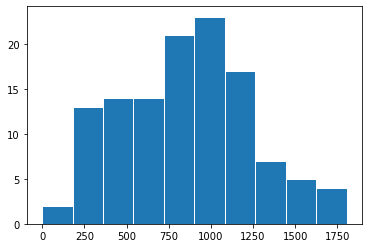

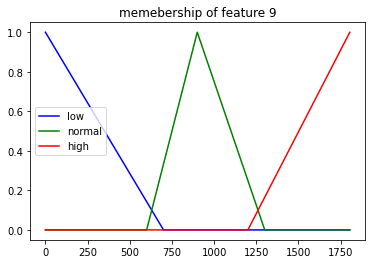

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


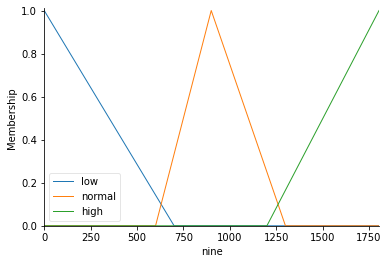

In [17]:
#feature nine

nine= list(Datas['f9'])

plt.figure()
plt.hist(nine,edgecolor="white")
plt.show()
minn= np.min(nine)
maxx = np.max(nine)

dom = np.arange(minn, maxx,1)

ninelow = skfuzzy.membership.trimf(dom ,[minn,minn,700] )
ninenormal= skfuzzy.membership.trimf(dom ,[600,900,1300] )
ninehigh = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
fuzzyfiedsets.append([ninelow,ninenormal,ninehigh])

plt.figure()
plt.plot(ninelow , 'b',label='low')
plt.plot(ninenormal , 'g',label='normal')
plt.plot(ninehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 9')
plt.legend()
plt.show()


nine = ctrl.Antecedent(dom, 'nine')

nine['low'] = skfuzzy.membership.trimf(dom,[minn,minn,700] )
nine['normal']= skfuzzy.membership.trimf(dom,[600,900,1300] )
nine['high'] = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
memberships.append([nine['low'] , nine['normal'] ,nine['high']])

nine.view()

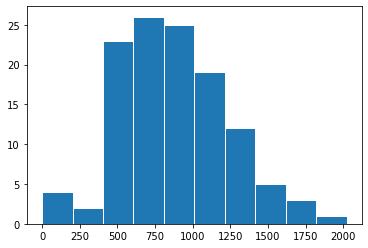

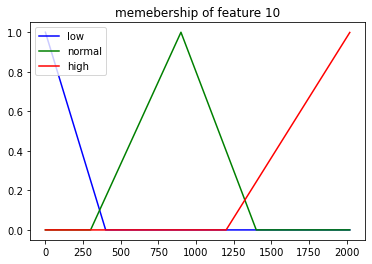

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


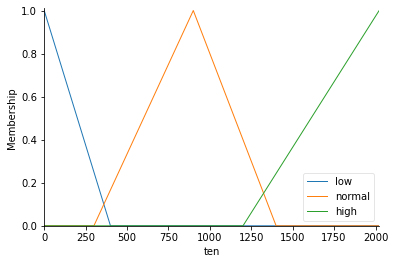

In [18]:
#feature ten

ten= list(Datas['f10'])

plt.figure()
plt.hist(ten,edgecolor="white")
plt.show()
minn= np.min(ten)
maxx = np.max(ten)

dom = np.arange(minn, maxx,1)

tenlow = skfuzzy.membership.trimf(dom ,[minn,minn,400] )
tennormal= skfuzzy.membership.trimf(dom ,[300,900,1400] )
tenhigh = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
fuzzyfiedsets.append([tenlow,tennormal,tenhigh])

plt.figure()
plt.plot(tenlow , 'b',label='low')
plt.plot(tennormal , 'g',label='normal')
plt.plot(tenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 10')
plt.legend()
plt.show()


ten = ctrl.Antecedent(dom, 'ten')

ten['low'] = skfuzzy.membership.trimf(dom,[minn,minn,400] )
ten['normal']= skfuzzy.membership.trimf(dom,[300,900,1400] )
ten['high'] = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
memberships.append([ten['low'] , ten['normal'] ,ten['high']])

ten.view()

In [19]:
# #feature eleven

# eleven= list(Datas['f11'])

# plt.figure()
# plt.hist(eleven,edgecolor="white")
# plt.show()
# minn= np.min(eleven)
# maxx = np.max(eleven)

# dom = np.arange(minn, maxx,1)

# elevenlow = skfuzzy.membership.trimf(dom ,[minn,minn,450] )
# elevennormal= skfuzzy.membership.trimf(dom ,[300,900,1400] )
# elevenhigh = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
# fuzzyfiedsets.append([elevenlow,elevennormal,elevenhigh])

# plt.figure()
# plt.plot(elevenlow , 'b',label='low')
# plt.plot(elevennormal , 'g',label='normal')
# plt.plot(elevenhigh , 'r',label='high')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of feature 11')
# plt.legend()
# plt.show()


# eleven = ctrl.Antecedent(dom, 'eleven')

# eleven['low'] = skfuzzy.membership.trimf(dom,[minn,minn,450] )
# eleven['normal']= skfuzzy.membership.trimf(dom,[300,900,1400] )
# eleven['high'] = skfuzzy.membership.trimf(dom ,[1200,maxx,maxx])
# memberships.append([eleven['low'] , eleven['normal'] ,eleven['high']])

# eleven.view()

In [20]:
# #feature twelve

# twelve= list(Datas['f12'])

# plt.figure()
# plt.hist(twelve,edgecolor="white")
# plt.show()
# minn= np.min(twelve)
# maxx = np.max(twelve)

# dom = np.arange(minn, maxx,1)

# twelvelow = skfuzzy.membership.trimf(dom ,[minn,minn,300] )
# twelvenormal= skfuzzy.membership.trimf(dom ,[200,450,650] )
# twelvehigh = skfuzzy.membership.trimf(dom ,[550,maxx,maxx])
# fuzzyfiedsets.append([twelvelow,twelvenormal,twelvehigh])

# plt.figure()
# plt.plot(twelvelow , 'b',label='low')
# plt.plot(twelvenormal , 'g',label='normal')
# plt.plot(twelvehigh , 'r',label='high')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of feature 12')
# plt.legend()
# plt.show()


# twelve = ctrl.Antecedent(dom, 'twelve')

# twelve['low'] = skfuzzy.membership.trimf(dom,[minn,minn,300] )
# twelve['normal']= skfuzzy.membership.trimf(dom,[200,450,650] )
# twelve['high'] = skfuzzy.membership.trimf(dom ,[550,maxx,maxx])
# memberships.append([twelve['low'] , twelve['normal'] ,twelve['high']])

# twelve.view()

In [21]:
# #feature thirteen

# thirteen= list(Datas['f13'])

# plt.figure()
# plt.hist(thirteen,edgecolor="white")
# plt.show()
# minn= np.min(thirteen)
# maxx = np.max(thirteen)

# dom = np.arange(minn, maxx,1)

# thirteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,400] )
# thirteennormal= skfuzzy.membership.trimf(dom ,[300,600,1000] )
# thirteenhigh = skfuzzy.membership.trimf(dom ,[900,maxx,maxx])
# fuzzyfiedsets.append([thirteenlow,thirteennormal,thirteenhigh])

# plt.figure()
# plt.plot(thirteenlow , 'b',label='low')
# plt.plot(thirteennormal , 'g',label='normal')
# plt.plot(thirteenhigh , 'r',label='high')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of feature 13')
# plt.legend()
# plt.show()


# thirteen = ctrl.Antecedent(dom, 'thirteen')

# thirteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,400] )
# thirteen['normal']= skfuzzy.membership.trimf(dom,[300,600,1000] )
# thirteen['high'] = skfuzzy.membership.trimf(dom ,[900,maxx,maxx])
# memberships.append([thirteen['low'] , thirteen['normal'] ,thirteen['high']])

# thirteen.view()

In [22]:
# #feature fourteen

# fourteen= list(Datas['f14'])

# plt.figure()
# plt.hist(fourteen,edgecolor="white")
# plt.show()
# minn= np.min(fourteen)
# maxx = np.max(fourteen)

# dom = np.arange(minn, maxx,1)

# fourteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,400] )
# fourteennormal= skfuzzy.membership.trimf(dom ,[300,750,1100] )
# fourteenhigh = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
# fuzzyfiedsets.append([fourteenlow,fourteennormal,fourteenhigh])

# plt.figure()
# plt.plot(fourteenlow , 'b',label='low')
# plt.plot(fourteennormal , 'g',label='normal')
# plt.plot(fourteenhigh , 'r',label='high')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of feature 14')
# plt.legend()
# plt.show()


# fourteen = ctrl.Antecedent(dom, 'fourteen')

# fourteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,400] )
# fourteen['normal']= skfuzzy.membership.trimf(dom,[300,750,1100] )
# fourteen['high'] = skfuzzy.membership.trimf(dom ,[1000,maxx,maxx])
# memberships.append([fourteen['low'] , fourteen['normal'] ,fourteen['high']])

# fourteen.view()

In [23]:
# #feature fifteen

# fifteen= list(Datas['f15'])

# plt.figure()
# plt.hist(fifteen,edgecolor="white")
# plt.show()
# minn= np.min(fifteen)
# maxx = np.max(fifteen)

# dom = np.arange(minn, maxx,1)

# fifteenlow = skfuzzy.membership.trimf(dom ,[minn,minn,400] )
# fifteennormal= skfuzzy.membership.trimf(dom ,[300,600,1000] )
# fifteenhigh = skfuzzy.membership.trimf(dom ,[900,maxx,maxx])
# fuzzyfiedsets.append([fifteenlow,fifteennormal,fifteenhigh])

# plt.figure()
# plt.plot(fifteenlow , 'b',label='low')
# plt.plot(fifteennormal , 'g',label='normal')
# plt.plot(fifteenhigh , 'r',label='high')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of feature 15')
# plt.legend()
# plt.show()


# fifteen = ctrl.Antecedent(dom, 'fifteen')

# fifteen['low'] = skfuzzy.membership.trimf(dom,[minn,minn,400] )
# fifteen['normal']= skfuzzy.membership.trimf(dom,[300,600,1000] )
# fifteen['high'] = skfuzzy.membership.trimf(dom ,[900,maxx,maxx])
# memberships.append([fifteen['low'] , fifteen['normal'] ,fifteen['high']])

# fifteen.view()

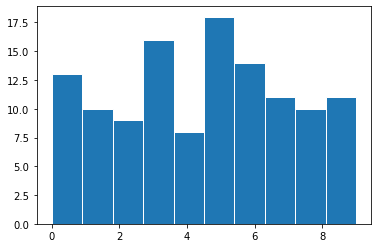

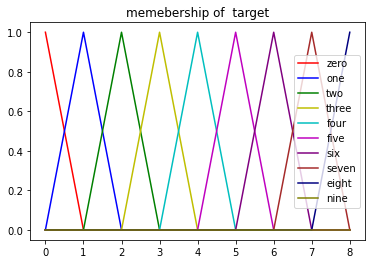

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


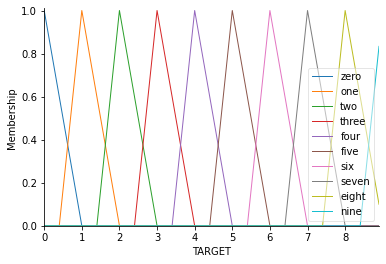

In [24]:
#TARGET 

target= list(Datas['TARGET'])

plt.figure()
plt.hist(target,edgecolor="white")
plt.show()
minn= np.min(target)
maxx = np.max(target)

dom = np.arange(minn, maxx,1)
trdom = dom
targetzero = skfuzzy.membership.trimf(dom ,[0,0,1])
targetone = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
targettwo= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
targetthree = skfuzzy.membership.trimf(dom ,[2.4,3,4])
targetfour = skfuzzy.membership.trimf(dom ,[3.4,4,5])
targetfive = skfuzzy.membership.trimf(dom ,[4.4,5,6])
targetsix = skfuzzy.membership.trimf(dom ,[5.4,6,7])
targetseven = skfuzzy.membership.trimf(dom ,[6.4,7,8])
targeteight = skfuzzy.membership.trimf(dom ,[7.4,8,9])
targetnine = skfuzzy.membership.trimf(dom ,[8.4,9,10])

fuzzyfiedtarget.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

plt.figure()
plt.plot(targetzero , 'r',label='zero')
plt.plot(targetone , 'b',label='one')
plt.plot(targettwo , 'g',label='two')
plt.plot(targetthree , 'y',label='three')
plt.plot(targetfour , 'c',label='four')
plt.plot(targetfive , 'm',label='five')
plt.plot(targetsix , 'purple',label='six')
plt.plot(targetseven , 'brown',label='seven')
plt.plot(targeteight , 'navy',label='eight')
plt.plot(targetnine , 'olive',label='nine')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of  target')
plt.legend()
plt.show()

dom = np.arange(minn, maxx,0.1)
target = ctrl.Consequent(dom, 'TARGET')

target['zero'] = skfuzzy.membership.trimf(dom ,[0,0,1])
target['one'] = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
target['two']= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
target['three'] = skfuzzy.membership.trimf(dom ,[2.4,3,4])
target['four'] = skfuzzy.membership.trimf(dom ,[3.4,4,5])
target['five'] = skfuzzy.membership.trimf(dom ,[4.4,5,6])
target['six'] = skfuzzy.membership.trimf(dom ,[5.4,6,7])
target['seven'] = skfuzzy.membership.trimf(dom ,[6.4,7,8])
target['eight'] = skfuzzy.membership.trimf(dom ,[7.4,8,9])
target['nine'] = skfuzzy.membership.trimf(dom ,[8.4,9,10])
memberships.append([target['zero'], target['one'] ,target['two'],target['three'],target['four'],target['five'],target['six'],target['seven'],target['eight'],target['nine']])

target.view()

In [25]:
# #TARGET 

# target= list(Datas['TARGET'])

# plt.figure()
# plt.hist(target,edgecolor="white")
# plt.show()
# minn= np.min(target)
# maxx = np.max(target)

# dom = np.arange(minn, maxx,0.1)
# trdom = dom
# targetzero = skfuzzy.membership.trimf(dom ,[0,0,0])
# targetone = skfuzzy.membership.trimf(dom ,[1,1,1] )
# targettwo= skfuzzy.membership.trimf(dom ,[2,2,2] )
# targetthree = skfuzzy.membership.trimf(dom ,[3,3,3])
# targetfour = skfuzzy.membership.trimf(dom ,[4,4,4])
# targetfive = skfuzzy.membership.trimf(dom ,[5,5,5])
# targetsix = skfuzzy.membership.trimf(dom ,[6,6,6])
# targetseven = skfuzzy.membership.trimf(dom ,[7,7,7])
# targeteight = skfuzzy.membership.trimf(dom ,[8,8,8])
# targetnine = skfuzzy.membership.trimf(dom ,[9,9,9])

# fuzzyfiedtarget.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

# plt.figure()
# plt.plot(targetzero , 'r',label='zero')
# plt.plot(targetone , 'b',label='one')
# plt.plot(targettwo , 'g',label='two')
# plt.plot(targetthree , 'y',label='three')
# plt.plot(targetfour , 'c',label='four')
# plt.plot(targetfive , 'm',label='five')
# plt.plot(targetsix , 'purple',label='six')
# plt.plot(targetseven , 'brown',label='seven')
# plt.plot(targeteight , 'navy',label='eight')
# plt.plot(targetnine , 'olive',label='nine')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of  target')
# plt.legend()
# plt.show()


# target = ctrl.Consequent(dom, 'TARGET')

# target['zero'] = skfuzzy.membership.trimf(dom ,[0,0,0])
# target['one'] = skfuzzy.membership.trimf(dom ,[1,1,1] )
# target['two']= skfuzzy.membership.trimf(dom ,[2,2,2] )
# target['three'] = skfuzzy.membership.trimf(dom ,[3,3,3])
# target['four'] = skfuzzy.membership.trimf(dom ,[4,4,4])
# target['five'] = skfuzzy.membership.trimf(dom ,[5,5,5])
# target['six'] = skfuzzy.membership.trimf(dom ,[6,6,6])
# target['seven'] = skfuzzy.membership.trimf(dom ,[7,7,7])
# target['eight'] = skfuzzy.membership.trimf(dom ,[8,8,8])
# target['nine'] = skfuzzy.membership.trimf(dom ,[9,9,9])
# memberships.append([target['zero'], target['one'] ,target['two'],target['three'],target['four'],target['five'],target['six'],target['seven'],target['eight'],target['nine']])

# target.view()

In [26]:
a = np.array(fuzzyfiedsets,dtype=object)
print(a.shape)
memberships
b = np.array(memberships,dtype=object)
print(b.shape)
b

(10, 3)
(11,)


array([list([one[low], one[normal], one[high]]),
       list([two[low], two[normal], two[high]]),
       list([three[low], three[normal], three[high]]),
       list([four[low], four[normal], four[high]]),
       list([five[low], five[normal], five[high]]),
       list([six[low], six[normal], six[high]]),
       list([seven[low], seven[normal], seven[high]]),
       list([eight[low], eight[normal], eight[high]]),
       list([nine[low], nine[normal], nine[high]]),
       list([ten[low], ten[normal], ten[high]]),
       list([TARGET[zero], TARGET[one], TARGET[two], TARGET[three], TARGET[four], TARGET[five], TARGET[six], TARGET[seven], TARGET[eight], TARGET[nine]])],
      dtype=object)

In [27]:
AllRules = []
for  row  in  Datas.iterrows():
    rule=[]
    for  i , c in enumerate(Datas.columns):
        if(i !=10):
            dom = np.arange(Datas[c].min(), Datas[c].max() ,1)

            lowship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][0],row[1][c])
            normalship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][1],row[1][c])
            highship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][2],row[1][c])
            rule.append(np.argmax([lowship , normalship , highship]))
    rule.append(row[1]['TARGET'])
    if (rule in AllRules):
        continue
    AllRules.append(rule)
        


In [28]:
def defineRule(AllRules , memberships,fuzzyfiedsets):
    rules = []
    for i in range (len(AllRules)):
        rl = []
        for j in range(len(AllRules[i])):
            # print(type(AllRules[i][j]))
            rl.append(memberships[j][int(AllRules[i][j])])
        rules.append(rl)
    return rules
                
    
    

In [29]:
def setrules(rules):
    label_rules = []
    for i in range(len(rules)):
        rule = ctrl.Rule(rules[i][0] & rules[i][1] & rules[i][2] & rules[i][3] & rules[i][4] & rules[i][5]& rules[i][6]& rules[i][7] & rules[i][8] & rules[i][9] , rules[i][10]  )
        # rule = ctrl.Rule(rules[i][0] & rules[i][1] , rules[i][2]  )
        label_rules.append(rule)
    return label_rules

In [30]:
rules = defineRule(AllRules,memberships,fuzzyfiedsets)
len(rules)

117

In [31]:
label_rules = setrules(rules)
label_rules[2]

IF ((((((((one[low] AND two[normal]) AND three[high]) AND four[high]) AND five[normal]) AND six[normal]) AND seven[normal]) AND eight[low]) AND nine[low]) AND ten[normal] THEN TARGET[nine]
	AND aggregation function : fmin
	OR aggregation function  : fmax

In [32]:
tipping_ctrl = ctrl.ControlSystem(label_rules)
label_result = ctrl.ControlSystemSimulation(tipping_ctrl)
memberships

[[one[low], one[normal], one[high]],
 [two[low], two[normal], two[high]],
 [three[low], three[normal], three[high]],
 [four[low], four[normal], four[high]],
 [five[low], five[normal], five[high]],
 [six[low], six[normal], six[high]],
 [seven[low], seven[normal], seven[high]],
 [eight[low], eight[normal], eight[high]],
 [nine[low], nine[normal], nine[high]],
 [ten[low], ten[normal], ten[high]],
 [TARGET[zero],
  TARGET[one],
  TARGET[two],
  TARGET[three],
  TARGET[four],
  TARGET[five],
  TARGET[six],
  TARGET[seven],
  TARGET[eight],
  TARGET[nine]]]

In [33]:
count = 0
predict = []
norl = []
for j, test in TestData.iterrows():
    count = count+1
    # print(test['f1'])
    label_result.input['one'] = test['f1']
    # print(test['f2'])
    label_result.input['two'] = test['f2']
    # print(test['f3'])
    label_result.input['three'] = test['f3']
    # print(test['f4'])
    label_result.input['four'] = test['f4']
    # print(test['f5'])
    label_result.input['five'] = test['f5']
    # print(test['f6'])
    label_result.input['six'] = test['f6']
    # print(test['f7'])
    label_result.input['seven'] = test['f7']
    # print(test['f8'])
    label_result.input['eight'] = test['f8']
    # print(test['f9'])
    label_result.input['nine'] = test['f9']
    # print(test['f10'])
    label_result.input['ten'] = test['f10']
    # # print(test['f11'])
    # label_result.input['eleven'] = test['f11']
    # # print(test['f12'])
    # label_result.input['twelve'] = test['f12']
    # # print(test['f13'])
    # label_result.input['thirteen'] = test['f13']
    # # print(test['f14'])
    # label_result.input['fourteen'] = test['f14']
    # # print(test['f15'])
    # label_result.input['fifteen'] = test['f15']
    try:

        label_result.compute()
        # label_result.print_state()
        # label.view(sim=label_result)
        predict.append(label_result.output['TARGET'])
        
    except:
        predict.append(-1)
print(predict)

[0.4913732128165341, -1, -1, 2.1977530708321797, -1, -1, -1, -1, -1, -1, -1, -1, 7.194549022873338, -1, -1, 4.188772126781534, -1, -1, 8.670311993779842, -1, -1, 3.1696505479128945, -1, -1, -1, 8.665178066273091, -1, -1, -1, -1]


In [34]:
def prediction(predict , fuzzyfiedtarget,dom):
    pred = []
    for i in range (len(predict)):
        if(predict[i]!= -1):
            a=[]
            targt0 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][0],predict[i])
            a.append(targt0)
            targt1  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][1],predict[i])
            a.append(targt1)
            targt2 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][2],predict[i])
            a.append(targt2)
            targt3  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][3],predict[i])
            a.append(targt3)
            targt4 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][4],predict[i])
            a.append(targt4)
            targt5  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][5],predict[i])
            a.append(targt5)
            targt6 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][6],predict[i])
            a.append(targt6)
            targt7  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][7],predict[i])
            a.append(targt7)
            targt8  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][8],predict[i])
            a.append(targt8)
            targt9 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][9],predict[i])
            a.append(targt9)
            
            
            pred.append(np.argmax(a))
        else:
            pred.append(-1)
            



            
            
    return pred

In [35]:
predicted = prediction(predict , fuzzyfiedtarget,trdom)


In [36]:
accuracy_score(targetTest, predicted)

0.1